# MSc Thesis - Hugo Stam

### Example 03 - Offshore Port System - Bridge

<img src="Figures/system_layout_alternative_3B.png" style="width:1000px">

##### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
# %matplotlib inline
%matplotlib notebook
import seaborn as sns
sns.set(style="ticks")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# OpenTISim package
from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system_offshore_bridge

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets
from IPython.display import HTML

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

# 0. Prepare inputs

In [2]:
# iPython Widgests
life_cycle = widgets.IntSlider(value=10, min=10, max=30, step=5, description='Life cycle:')
annual_demand = widgets.IntSlider(value=1000000, min=500000, max=1500000, step=50000, description='Demand:')
offshore_onshore_distance = widgets.IntSlider(value=40, min=20, max=60, step=20, description='Distance:')

container_ship = widgets.Dropdown(options=[('Post Panamax I (6,000 TEU)', 6000),
                                           ('New-Panamax (12,500 TEU)', 12500),
                                           ('ULCS (21,000 TEU)', 21000)], 
                                  value=12500, description='OGV:')

foreshore_slope = widgets.Dropdown(options=[('Gently (3 km/m)', 3.0), 
                                            ('Average (2 km/m)', 2.0),
                                            ('Steep (1 km/m)', 1.0)], 
                                   value=2.0, description='Slope:')

print('\033[1m*** Input Values \033[0m')
display(annual_demand, offshore_onshore_distance, container_ship,
        foreshore_slope, life_cycle)

*** Input Values 


IntSlider(value=1000000, description='Demand:', max=1500000, min=500000, step=50000)

IntSlider(value=40, description='Distance:', max=60, min=20, step=20)

Dropdown(description='OGV:', index=1, options=(('Post Panamax I (6,000 TEU)', 6000), ('New-Panamax (12,500 TEU…

Dropdown(description='Slope:', index=1, options=(('Gently (3 km/m)', 3.0), ('Average (2 km/m)', 2.0), ('Steep …

IntSlider(value=10, description='Life cycle:', max=30, min=10, step=5)

In [3]:
offshore_distance = offshore_onshore_distance.value
demand = annual_demand.value
design_container_ship = container_ship.value
slope = foreshore_slope.value
lifecycle = life_cycle.value

print('The offshore distance:', offshore_distance, 'km')
print('The annual demand:', demand, 'TEU')
print('The design container ship capacity:', design_container_ship, 'TEU')
print('The slope of the foreshore:', slope, 'in km reach per meter water depth')
print('The design life cycle:', lifecycle, 'years')

avg_parcel = design_container_ship / 8

startyear = 2020

The offshore distance: 40 km
The annual demand: 1000000 TEU
The design container ship capacity: 12500 TEU
The slope of the foreshore: 2.0 in km reach per meter water depth
The design life cycle: 10 years


## 0.1 Generate demand forecast scenario

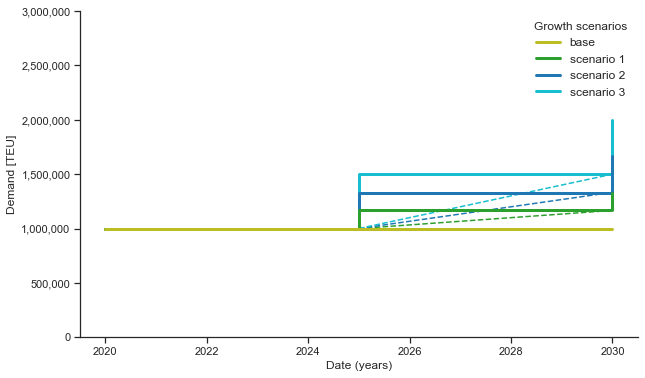

In [4]:
container = demand  # TEU
years = list(range(startyear, startyear+lifecycle+1))

trend_1 = []
trend_2 = []
trend_3 = []

for i in range(lifecycle-4):
    trend_1.append(container +   500_000/15 * i)
    trend_2.append(container + 1_000_000/15 * i)
    trend_3.append(container + 1_500_000/15 * i)

demand_0 = []
demand_1 = []
demand_2 = []
demand_3 = []

for year in years:
    if year < 2025:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.00))
        demand_2.append(int(container * 1.00))
        demand_3.append(int(container * 1.00))
        
    elif year < 2030:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.17))
        demand_2.append(int(container * 1.33))
        demand_3.append(int(container * 1.50))
    elif year < 2035:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.33))
        demand_2.append(int(container * 1.67))
        demand_3.append(int(container * 2.00))
    else:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.50))
        demand_2.append(int(container * 2.00))
        demand_3.append(int(container * 2.50))

# figure 
plt.figure(figsize=(10,6))

plt.plot(years[5:lifecycle+1], trend_1, color='tab:green', linestyle='--', zorder=0)
plt.plot(years[5:lifecycle+1], trend_2, color='tab:blue' , linestyle='--', zorder=0)
plt.plot(years[5:lifecycle+1], trend_3, color='tab:cyan' , linestyle='--', zorder=0)

plt.step(years, demand_0, color='tab:olive', linewidth=3, label='base', where='post', zorder=4)
plt.step(years, demand_1, color='tab:green', linewidth=3, label='scenario 1', where='post', zorder=3)
plt.step(years, demand_2, color='tab:blue' , linewidth=3, label='scenario 2', where='post', zorder=2)
plt.step(years, demand_3, color='tab:cyan' , linewidth=3, label='scenario 3', where='post', zorder=1)
    
plt.xlabel("Date (years)", fontsize='large')

if lifecycle == 20:
    plt.xticks([2020, 2025, 2030, 2035, 2040])

plt.yticks([0, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6],
           [0, '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'])
plt.ylabel('Demand [TEU]', fontsize='large')

plt.legend(loc='best', title='Growth scenarios', title_fontsize='large', fontsize='large', frameon=False)

# figure aesthetics
plt.grid(False, which='major')
sns.despine(top=True)

# save fig
if lifecycle == 20:
    plt.savefig("SaveFigures/growth_scenarios.png")

In [5]:
if lifecycle == 20:
    years = years[0:20]
    demand_0 = demand_0[0:20]
    demand_1 = demand_1[0:20]
    demand_2 = demand_2[0:20]
    demand_3 = demand_3[0:20]
    
if lifecycle == 10:
    years = years[0:10]
    demand_0 = demand_0[0:10]
    demand_1 = demand_1[0:10]
    demand_2 = demand_2[0:10]
    demand_3 = demand_3[0:10]

# print('Years: ', len(years), years)    
# print('Demand:', len(demand_2), demand_2)

In [6]:
years = list(range(startyear, startyear + lifecycle))
        
scenario_demand = demand_2
scenario_data={'year': years, 'volume': scenario_demand}
# print(scenario_data)

# instantiate Commodity objects, the inputs for the Commodity class
if design_container_ship == 6000:
    container_defaults.container_data['post_panamax_I_perc'] = 100
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 0

if design_container_ship == 12500:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 100
    container_defaults.container_data['ULCS_perc'] = 0
    
if design_container_ship == 21000:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 100
    
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)
# print(container)
# print(container.scenario_data)

# combine
demand = [container]

## 0.2 Generate vessels

In [7]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

Specify the variables

In [8]:
OffshoreBridge = container_system_offshore_bridge.System(
                 startyear = startyear,
                 lifecycle = lifecycle,
                 stack_equipment = 'rtg',
                 laden_stack = 'rtg',
                 elements = demand + vessels,
                 crane_type_defaults = container_defaults.sts_crane_data,
                 offshore_distance = offshore_distance,
                 onshore_perc = 0.75,
                 foreshore_slope = slope,
                 bathymetry_factor = 0.50,
                 allowable_berth_occupancy = 0.70,
                 offshore_dwell_time = 2.0,
                 transhipment_ratio = 0.0,
                 debug = True)

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, {revenues})
    7. calculate PV's {and aggregate to NPV}

In [9]:
OffshoreBridge.simulate()


Offshore Port System - Bridge Connection

Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

  >> nr of OGV berths: 1
     >> max vessel length: 366
     >> The length of the quay is 396 m
     >> The water depth at the quay is 19 m

     >> The length of the quay that needs to be built 396 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,28785033.6,0.00,0.00
1,2021,19190022.4,0.00,0.00
2,2022,0.0,405250.56,405250.56
3,2023,0.0,405250.56,405250.56
4,2024,0.0,405250.56,405250.56


     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 3.338
     Berth occupancy online  (after adding Crane): inf

  >> nr of OGV berths: 1
  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 1.891
     Berth occupancy online  (after adding Crane): inf

  >> nr of OGV berths: 1
  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 1.409
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.187
     Berth occupancy online  (after adding Berth): inf

  >> nr of OGV berths: 2
     >> max vessel length: 366
     >> The length of the quay is 853 m
     >> The water depth at the quay is 19 m

     >> The length of the quay that needs to be built 457 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,33001811.4,0.000,0.000
1,2021,22001207.6,0.000,0.000
2,2022,0.0,467880.192,467880.192
3,2023,0.0,467880.192,467880.192
4,2024,0.0,467880.192,467880.192


     Berth occupancy planned (after adding Quay): 1.187
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.946
     Berth occupancy online  (after adding Crane): inf

  >> nr of OGV berths: 2
  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.801
     Berth occupancy online  (after adding Crane): inf

  >> nr of OGV berths: 2
  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.705
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.63
     Berth occupancy online  (after adding Berth): inf

  >> nr of OGV berths: 3
     >> max vessel length: 366
     >> The length of the quay is 1,272 m
     >> The water depth at the quay is 19 m

     >> The length of the quay that needs to be built 419 m

  *** add Quay to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance
0,2020,30376660.2,0.000,0.000
1,2021,20251106.8,0.000,0.000
2,2022,0.0,428890.176,428890.176
3,2023,0.0,428890.176,428890.176
4,2024,0.0,428890.176,428890.176


     Berth occupancy planned (after adding Quay): 0.63
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.561
     Berth occupancy online  (after adding Crane): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 7
     Horizontal Transport online  (@ start of year): 0
     Horizontal Transport planned (@ start of year): 0
  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0,128125.0,0.0,0.0
2,2022,0.0,11300.0,125000.0,0.0,12712.5,140625.0
3,2023,0.0,11300.0,125000.0,0.0,12712.5,140625.0
4,2024,0.0,11300.0,125000.0,0.0,12712.5,140625.0


     Stack Capacity planned  (@ start of year): 0
     Stack Capacity online   (@ start of year): 0
     Stack Capacity required (@ start of year): 8608
     Laden and Reefer Ground Slots required (@ start of year): 1722

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,2071150.0,0.0,2277700.0,0.0
2,2022,0.0,165240.0,0.0,185895.0
3,2023,0.0,165240.0,0.0,185895.0
4,2024,0.0,165240.0,0.0,185895.0


     Empty Stack capacity planned  (@ start of year): 0
     Empty Stack capacity online   (@ start of year): 0
     Empty Stack capacity required (@ start of year): 714
     Empty Ground Slots required   (@ start of year): 119

  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,851200.0,0.0
2,2022,0.0,73440.0,0.0,82620.0
3,2023,0.0,73440.0,0.0,82620.0
4,2024,0.0,73440.0,0.0,82620.0


  *** add Empty Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,759400.0,0.0,851200.0,0.0
2,2022,0.0,73440.0,0.0,82620.0
3,2023,0.0,73440.0,0.0,82620.0
4,2024,0.0,73440.0,0.0,82620.0


     OOG Slots planned  (@ start of year): 0
     OOG Slots online   (@ start of year): 0
     OOG Slots required (@ start of year): 119

  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,1915000.0,0.0
2,2022,0.0,168000.0,0.0,189000.0
3,2023,0.0,168000.0,0.0,189000.0
4,2024,0.0,168000.0,0.0,189000.0


  *** add OOG stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,1705000.0,0.0,1915000.0,0.0
2,2022,0.0,168000.0,0.0,189000.0
3,2023,0.0,168000.0,0.0,189000.0
4,2024,0.0,168000.0,0.0,189000.0


     Total Ground Slots required   (@ start of year):  1,841
     Total Stack capacity required (@ start of year):  9,400 TEU
     Total Stack capacity online   (@ start of year):  0 TEU

     Number of stack Equipment online (@ start of year): 0

     Empty handlers planned (@ start of year): 0
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0,567500.0,0.0,0.0
2,2022,0.0,10000.0,125000.0,0.0,11250.0,140625.0
3,2023,0.0,10000.0,125000.0,0.0,11250.0,140625.0
4,2024,0.0,10000.0,125000.0,0.0,11250.0,140625.0


     Offshore Gate capacity planned     (@ start of year): 0
     Offshore Gate capacity online      (@ start of year): 0
     Offshore Gate capacity required    (@ start of year): 0
     Offshore Gate service rate planned (@ start of year): inf

  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 1
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 2
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 3
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 4
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 5
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 6
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 7
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 8
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of offshore lanes: 9
>>> Total offshore land use 21.5 ha
length 366
draught 15.2
beam 49.0
  *** add Access Channel to elements
channel_width 480 m
channel_depth 18 m
channel_length 0 m
channel_volume 0 m3
turning_circle_diameter 658 m3
turning_circle_volume 0 m3
berth_pocket_width 98 m
berth_pocket_volume 0 m3
dredging_volume 0 m3

channel_length_max 36,400 m
excavation_depth 0 m


,Year
0,2020
1,2021
2,2022
3,2023
4,2024


>>> Total offshore land use 21.5 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 215240.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation_area 215,000 m2
     >> reclamation_volume 4,305,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,102260380.0,0.00
1,2021,0.0,484503.93
2,2022,0.0,484503.93
3,2023,0.0,484503.93
4,2024,0.0,484503.93


>>> Total offshore land use 21.5 ha
>>> Total offshore land use 21.5 ha
     Reclamation area planned  (@ start of year): 0 ha
     Reclamation area online   (@ start of year): 0 ha
     Reclamation area required (@ start of year): 464.0 ha

  *** add Revetment to elements

     >> revetment_length 460 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,83509127.0,0.0
1,2021,0.0,835091.0
2,2022,0.0,835091.0
3,2023,0.0,835091.0
4,2024,0.0,835091.0


>>> Total offshore land use 21.5 ha

     >> bridge_length: 40 km
     Nr of Bridges planned     (@ start of year): 0
     Nr of Bridges online      (@ start of year): 0
     Nr of Bridges required    (@ start of year): 1

  *** add Bridge to elements
bridge capex: 1760000000


,Year,Bridge Capex,Bridge Opex
0,2020,1.056000e+09,0.0
1,2021,7.040000e+08,0.0
2,2022,0.000000e+00,44000000.0
3,2023,0.000000e+00,44000000.0
4,2024,0.000000e+00,44000000.0



     >> bridge_length: 40 km
truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 0
nr trucks required: 48
     Truck Capacity planned  (@ start of year): 0
     Truck Capacity online   (@ start of year): 0
     Truck Capacity required (@ start of year): 750000

  *** add Truck to elements
truck operations 0 USD
truck opex 75000 USD


,Year,Truck Labour
0,2020,0.0
1,2021,0.0
2,2022,75000.0
3,2023,75000.0
4,2024,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 1
nr trucks required: 48
  *** add Truck to elements
truck operations 2000 USD
truck opex 79000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,20000.0,0.0,0.0,0.0
2,2022,0.0,2000.0,2000.0,75000.0
3,2023,0.0,2000.0,2000.0,75000.0
4,2024,0.0,2000.0,2000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 2
nr trucks required: 48
  *** add Truck to elements
truck operations 4000 USD
truck opex 83000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,40000.0,0.0,0.0,0.0
2,2022,0.0,4000.0,4000.0,75000.0
3,2023,0.0,4000.0,4000.0,75000.0
4,2024,0.0,4000.0,4000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 3
nr trucks required: 48
  *** add Truck to elements
truck operations 6000 USD
truck opex 87000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,60000.0,0.0,0.0,0.0
2,2022,0.0,6000.0,6000.0,75000.0
3,2023,0.0,6000.0,6000.0,75000.0
4,2024,0.0,6000.0,6000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 4
nr trucks required: 48
  *** add Truck to elements
truck operations 8000 USD
truck opex 91000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,80000.0,0.0,0.0,0.0
2,2022,0.0,8000.0,8000.0,75000.0
3,2023,0.0,8000.0,8000.0,75000.0
4,2024,0.0,8000.0,8000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 5
nr trucks required: 48
  *** add Truck to elements
truck operations 10000 USD
truck opex 95000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,100000.0,0.0,0.0,0.0
2,2022,0.0,10000.0,10000.0,75000.0
3,2023,0.0,10000.0,10000.0,75000.0
4,2024,0.0,10000.0,10000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 6
nr trucks required: 48
  *** add Truck to elements
truck operations 12000 USD
truck opex 99000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,120000.0,0.0,0.0,0.0
2,2022,0.0,12000.0,12000.0,75000.0
3,2023,0.0,12000.0,12000.0,75000.0
4,2024,0.0,12000.0,12000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 7
nr trucks required: 48
  *** add Truck to elements
truck operations 14000 USD
truck opex 103000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,140000.0,0.0,0.0,0.0
2,2022,0.0,14000.0,14000.0,75000.0
3,2023,0.0,14000.0,14000.0,75000.0
4,2024,0.0,14000.0,14000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 8
nr trucks required: 48
  *** add Truck to elements
truck operations 16000 USD
truck opex 107000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,160000.0,0.0,0.0,0.0
2,2022,0.0,16000.0,16000.0,75000.0
3,2023,0.0,16000.0,16000.0,75000.0
4,2024,0.0,16000.0,16000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 9
nr trucks required: 48
  *** add Truck to elements
truck operations 18000 USD
truck opex 111000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,180000.0,0.0,0.0,0.0
2,2022,0.0,18000.0,18000.0,75000.0
3,2023,0.0,18000.0,18000.0,75000.0
4,2024,0.0,18000.0,18000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 10
nr trucks required: 48
  *** add Truck to elements
truck operations 20000 USD
truck opex 115000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,200000.0,0.0,0.0,0.0
2,2022,0.0,20000.0,20000.0,75000.0
3,2023,0.0,20000.0,20000.0,75000.0
4,2024,0.0,20000.0,20000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 11
nr trucks required: 48
  *** add Truck to elements
truck operations 22000 USD
truck opex 119000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,220000.0,0.0,0.0,0.0
2,2022,0.0,22000.0,22000.0,75000.0
3,2023,0.0,22000.0,22000.0,75000.0
4,2024,0.0,22000.0,22000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 12
nr trucks required: 48
  *** add Truck to elements
truck operations 24000 USD
truck opex 123000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,240000.0,0.0,0.0,0.0
2,2022,0.0,24000.0,24000.0,75000.0
3,2023,0.0,24000.0,24000.0,75000.0
4,2024,0.0,24000.0,24000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 13
nr trucks required: 48
  *** add Truck to elements
truck operations 26000 USD
truck opex 127000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,260000.0,0.0,0.0,0.0
2,2022,0.0,26000.0,26000.0,75000.0
3,2023,0.0,26000.0,26000.0,75000.0
4,2024,0.0,26000.0,26000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 14
nr trucks required: 48
  *** add Truck to elements
truck operations 28000 USD
truck opex 131000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,280000.0,0.0,0.0,0.0
2,2022,0.0,28000.0,28000.0,75000.0
3,2023,0.0,28000.0,28000.0,75000.0
4,2024,0.0,28000.0,28000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 15
nr trucks required: 48
  *** add Truck to elements
truck operations 30000 USD
truck opex 135000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,300000.0,0.0,0.0,0.0
2,2022,0.0,30000.0,30000.0,75000.0
3,2023,0.0,30000.0,30000.0,75000.0
4,2024,0.0,30000.0,30000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 16
nr trucks required: 48
  *** add Truck to elements
truck operations 32000 USD
truck opex 139000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,320000.0,0.0,0.0,0.0
2,2022,0.0,32000.0,32000.0,75000.0
3,2023,0.0,32000.0,32000.0,75000.0
4,2024,0.0,32000.0,32000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 17
nr trucks required: 48
  *** add Truck to elements
truck operations 34000 USD
truck opex 143000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,340000.0,0.0,0.0,0.0
2,2022,0.0,34000.0,34000.0,75000.0
3,2023,0.0,34000.0,34000.0,75000.0
4,2024,0.0,34000.0,34000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 18
nr trucks required: 48
  *** add Truck to elements
truck operations 36000 USD
truck opex 147000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,360000.0,0.0,0.0,0.0
2,2022,0.0,36000.0,36000.0,75000.0
3,2023,0.0,36000.0,36000.0,75000.0
4,2024,0.0,36000.0,36000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 19
nr trucks required: 48
  *** add Truck to elements
truck operations 38000 USD
truck opex 151000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,380000.0,0.0,0.0,0.0
2,2022,0.0,38000.0,38000.0,75000.0
3,2023,0.0,38000.0,38000.0,75000.0
4,2024,0.0,38000.0,38000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 20
nr trucks required: 48
  *** add Truck to elements
truck operations 40000 USD
truck opex 155000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,400000.0,0.0,0.0,0.0
2,2022,0.0,40000.0,40000.0,75000.0
3,2023,0.0,40000.0,40000.0,75000.0
4,2024,0.0,40000.0,40000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 21
nr trucks required: 48
  *** add Truck to elements
truck operations 42000 USD
truck opex 159000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,420000.0,0.0,0.0,0.0
2,2022,0.0,42000.0,42000.0,75000.0
3,2023,0.0,42000.0,42000.0,75000.0
4,2024,0.0,42000.0,42000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 22
nr trucks required: 48
  *** add Truck to elements
truck operations 44000 USD
truck opex 163000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,440000.0,0.0,0.0,0.0
2,2022,0.0,44000.0,44000.0,75000.0
3,2023,0.0,44000.0,44000.0,75000.0
4,2024,0.0,44000.0,44000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 23
nr trucks required: 48
  *** add Truck to elements
truck operations 46000 USD
truck opex 167000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,460000.0,0.0,0.0,0.0
2,2022,0.0,46000.0,46000.0,75000.0
3,2023,0.0,46000.0,46000.0,75000.0
4,2024,0.0,46000.0,46000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 24
nr trucks required: 48
  *** add Truck to elements
truck operations 48000 USD
truck opex 171000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,480000.0,0.0,0.0,0.0
2,2022,0.0,48000.0,48000.0,75000.0
3,2023,0.0,48000.0,48000.0,75000.0
4,2024,0.0,48000.0,48000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 25
nr trucks required: 48
  *** add Truck to elements
truck operations 50000 USD
truck opex 175000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,500000.0,0.0,0.0,0.0
2,2022,0.0,50000.0,50000.0,75000.0
3,2023,0.0,50000.0,50000.0,75000.0
4,2024,0.0,50000.0,50000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 26
nr trucks required: 48
  *** add Truck to elements
truck operations 52000 USD
truck opex 179000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,520000.0,0.0,0.0,0.0
2,2022,0.0,52000.0,52000.0,75000.0
3,2023,0.0,52000.0,52000.0,75000.0
4,2024,0.0,52000.0,52000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 27
nr trucks required: 48
  *** add Truck to elements
truck operations 54000 USD
truck opex 183000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,540000.0,0.0,0.0,0.0
2,2022,0.0,54000.0,54000.0,75000.0
3,2023,0.0,54000.0,54000.0,75000.0
4,2024,0.0,54000.0,54000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 28
nr trucks required: 48
  *** add Truck to elements
truck operations 56000 USD
truck opex 187000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,560000.0,0.0,0.0,0.0
2,2022,0.0,56000.0,56000.0,75000.0
3,2023,0.0,56000.0,56000.0,75000.0
4,2024,0.0,56000.0,56000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 29
nr trucks required: 48
  *** add Truck to elements
truck operations 58000 USD
truck opex 191000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,580000.0,0.0,0.0,0.0
2,2022,0.0,58000.0,58000.0,75000.0
3,2023,0.0,58000.0,58000.0,75000.0
4,2024,0.0,58000.0,58000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 30
nr trucks required: 48
  *** add Truck to elements
truck operations 60000 USD
truck opex 195000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,600000.0,0.0,0.0,0.0
2,2022,0.0,60000.0,60000.0,75000.0
3,2023,0.0,60000.0,60000.0,75000.0
4,2024,0.0,60000.0,60000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 31
nr trucks required: 48
  *** add Truck to elements
truck operations 62000 USD
truck opex 199000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,620000.0,0.0,0.0,0.0
2,2022,0.0,62000.0,62000.0,75000.0
3,2023,0.0,62000.0,62000.0,75000.0
4,2024,0.0,62000.0,62000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 32
nr trucks required: 48
  *** add Truck to elements
truck operations 64000 USD
truck opex 203000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,640000.0,0.0,0.0,0.0
2,2022,0.0,64000.0,64000.0,75000.0
3,2023,0.0,64000.0,64000.0,75000.0
4,2024,0.0,64000.0,64000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 33
nr trucks required: 48
  *** add Truck to elements
truck operations 66000 USD
truck opex 207000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,660000.0,0.0,0.0,0.0
2,2022,0.0,66000.0,66000.0,75000.0
3,2023,0.0,66000.0,66000.0,75000.0
4,2024,0.0,66000.0,66000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 34
nr trucks required: 48
  *** add Truck to elements
truck operations 68000 USD
truck opex 211000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,680000.0,0.0,0.0,0.0
2,2022,0.0,68000.0,68000.0,75000.0
3,2023,0.0,68000.0,68000.0,75000.0
4,2024,0.0,68000.0,68000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 35
nr trucks required: 48
  *** add Truck to elements
truck operations 70000 USD
truck opex 215000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,700000.0,0.0,0.0,0.0
2,2022,0.0,70000.0,70000.0,75000.0
3,2023,0.0,70000.0,70000.0,75000.0
4,2024,0.0,70000.0,70000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 36
nr trucks required: 48
  *** add Truck to elements
truck operations 72000 USD
truck opex 219000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,720000.0,0.0,0.0,0.0
2,2022,0.0,72000.0,72000.0,75000.0
3,2023,0.0,72000.0,72000.0,75000.0
4,2024,0.0,72000.0,72000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 37
nr trucks required: 48
  *** add Truck to elements
truck operations 74000 USD
truck opex 223000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,740000.0,0.0,0.0,0.0
2,2022,0.0,74000.0,74000.0,75000.0
3,2023,0.0,74000.0,74000.0,75000.0
4,2024,0.0,74000.0,74000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 38
nr trucks required: 48
  *** add Truck to elements
truck operations 76000 USD
truck opex 227000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,760000.0,0.0,0.0,0.0
2,2022,0.0,76000.0,76000.0,75000.0
3,2023,0.0,76000.0,76000.0,75000.0
4,2024,0.0,76000.0,76000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 39
nr trucks required: 48
  *** add Truck to elements
truck operations 78000 USD
truck opex 231000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,780000.0,0.0,0.0,0.0
2,2022,0.0,78000.0,78000.0,75000.0
3,2023,0.0,78000.0,78000.0,75000.0
4,2024,0.0,78000.0,78000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 40
nr trucks required: 48
  *** add Truck to elements
truck operations 80000 USD
truck opex 235000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,800000.0,0.0,0.0,0.0
2,2022,0.0,80000.0,80000.0,75000.0
3,2023,0.0,80000.0,80000.0,75000.0
4,2024,0.0,80000.0,80000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 41
nr trucks required: 48
  *** add Truck to elements
truck operations 82000 USD
truck opex 239000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,820000.0,0.0,0.0,0.0
2,2022,0.0,82000.0,82000.0,75000.0
3,2023,0.0,82000.0,82000.0,75000.0
4,2024,0.0,82000.0,82000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 42
nr trucks required: 48
  *** add Truck to elements
truck operations 84000 USD
truck opex 243000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,840000.0,0.0,0.0,0.0
2,2022,0.0,84000.0,84000.0,75000.0
3,2023,0.0,84000.0,84000.0,75000.0
4,2024,0.0,84000.0,84000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 43
nr trucks required: 48
  *** add Truck to elements
truck operations 86000 USD
truck opex 247000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,860000.0,0.0,0.0,0.0
2,2022,0.0,86000.0,86000.0,75000.0
3,2023,0.0,86000.0,86000.0,75000.0
4,2024,0.0,86000.0,86000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 44
nr trucks required: 48
  *** add Truck to elements
truck operations 88000 USD
truck opex 251000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,880000.0,0.0,0.0,0.0
2,2022,0.0,88000.0,88000.0,75000.0
3,2023,0.0,88000.0,88000.0,75000.0
4,2024,0.0,88000.0,88000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 45
nr trucks required: 48
  *** add Truck to elements
truck operations 90000 USD
truck opex 255000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,900000.0,0.0,0.0,0.0
2,2022,0.0,90000.0,90000.0,75000.0
3,2023,0.0,90000.0,90000.0,75000.0
4,2024,0.0,90000.0,90000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 46
nr trucks required: 48
  *** add Truck to elements
truck operations 92000 USD
truck opex 259000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,920000.0,0.0,0.0,0.0
2,2022,0.0,92000.0,92000.0,75000.0
3,2023,0.0,92000.0,92000.0,75000.0
4,2024,0.0,92000.0,92000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 47
nr trucks required: 48
  *** add Truck to elements
truck operations 94000 USD
truck opex 263000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,940000.0,0.0,0.0,0.0
2,2022,0.0,94000.0,94000.0,75000.0
3,2023,0.0,94000.0,94000.0,75000.0
4,2024,0.0,94000.0,94000.0,75000.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 48
nr trucks required: 48
     Onshore Gate capacity planned     (@ start of year): 0
     Onshore Gate capacity online      (@ start of year): 0
     Onshore Gate capacity required    (@ start of year): 0
     Onshore Gate service rate planned (@ start of year): inf

  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 1
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 2
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 3
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 4
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 5
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 6
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of onshore lanes: 7
     Hinterland Gate capacity planned     (@ start of year): 0
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of year): 0
     Hinterland Gate service rate planned (@ start of year): inf

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 1
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 2
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 3
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 4
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 5

     Hinterland barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): inf [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 1
  >> nr of hinterland barge quays: 0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 130 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4804044.0,0.0,0.0
1,2021,3202696.0,0.0,0.0
2,2022,0.0,61942.4,61942.4
3,2023,0.0,61942.4,61942.4
4,2024,0.0,61942.4,61942.4


     Hinterland barge berth capacity planned     (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 275000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.399 [-]

  >> nr of hinterland barge cranes: 0
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 1
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 2
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 2
  >> nr of hinterland barge quays: 1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 138 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,5062754.4,0.00,0.00
1,2021,3375169.6,0.00,0.00
2,2022,0.0,65754.24,65754.24
3,2023,0.0,65754.24,65754.24
4,2024,0.0,65754.24,65754.24


     Hinterland barge berth capacity planned     (@ start of year): 229267.584 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 275000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.199 [-]

  >> nr of hinterland barge cranes: 2
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 3
     Hinterland barge crane capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

  >> nr of hinterland barge berths: 3
  >> nr of hinterland barge quays: 2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 343901.376 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 275000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.8 [-]

  >> nr of hinterland barge cranes: 3
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


  >> nr of onshore barge cranes: 4
     Hinterland barge crane capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]


Offshore Port System - Bridge Connection

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.561
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): 0.413
     Crane occupancy online  (@ start of year): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 7
     Horizontal Transport online  (@ start of year): 0
     Horizontal Transport planned

,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,3.385710e+07,0.000000,3.430710e+07,0.000000
1,2021,0.000000e+00,507856.498125,0.000000e+00,514606.498125
2,2022,0.000000e+00,507856.498125,0.000000e+00,514606.498125
3,2023,0.000000e+00,507856.498125,0.000000e+00,514606.498125
4,2024,0.000000e+00,507856.498125,0.000000e+00,514606.498125


length 366
draught 15.2
beam 49.0
>>> Total offshore land use 22.3 ha
     Reclamation area planned  (@ start of year): 215240.0 ha
     Reclamation area online   (@ start of year): 215240.0 ha
     Reclamation area required (@ start of year): 222840.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation_area 8,000 m2
     >> reclamation_volume 152,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,21280800.0,0.0
2,2022,0.0,193808.0
3,2023,0.0,193808.0
4,2024,0.0,193808.0


>>> Total offshore land use 22.3 ha
>>> Total offshore land use 22.3 ha
     Reclamation area planned  (@ start of year): 464.0 ha
     Reclamation area online   (@ start of year): 464.0 ha
     Reclamation area required (@ start of year): 472.0 ha

  *** add Revetment to elements

     >> revetment_length 10 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,1461540.0,0.0
2,2022,0.0,14615.0
3,2023,0.0,14615.0
4,2024,0.0,14615.0


>>> Total offshore land use 22.3 ha

     >> bridge_length: 40 km
     Nr of Bridges planned     (@ start of year): 1
     Nr of Bridges online      (@ start of year): 0
     Nr of Bridges required    (@ start of year): 1

truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 48
nr trucks required: 48
     Truck Capacity planned  (@ start of year): 755827
     Truck Capacity online   (@ start of year): 755827
     Truck Capacity required (@ start of year): 750000

     Onshore Gate capacity planned     (@ start of year): 420
     Onshore Gate capacity online      (@ start of year): 0
     Onshore Gate capacity required    (@ start of year): 395
     Onshore Gate service rate planned (@ start of year): 0.941

     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of yea

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0,1580625.0,0.0,0.0
2,2022,0.0,700000.0,125000.0,0.0,787500.0,140625.0
3,2023,0.0,700000.0,125000.0,0.0,787500.0,140625.0
4,2024,0.0,700000.0,125000.0,0.0,787500.0,140625.0


     Empty handlers planned (@ start of year): 35
     Offshore Gate capacity planned     (@ start of year): 540
     Offshore Gate capacity online      (@ start of year): 540
     Offshore Gate capacity required    (@ start of year): 527
     Offshore Gate service rate planned (@ start of year): 0.976

>>> Total offshore land use 22.3 ha
length 366
draught 15.2
beam 49.0
>>> Total offshore land use 22.3 ha
     Reclamation area planned  (@ start of year): 222840.0 ha
     Reclamation area online   (@ start of year): 222840.0 ha
     Reclamation area required (@ start of year): 222840.0 ha

>>> Total offshore land use 22.3 ha
     Reclamation area planned  (@ start of year): 472.0 ha
     Reclamation area online   (@ start of year): 472.0 ha
     Reclamation area required (@ start of year): 472.0 ha


     >> bridge_length: 40 km
     Nr of Bridges planned     (@ start of year): 1
     Nr of Bridges online      (@ start of year): 1
     Nr of Bridges required    (@ start of year): 1

t

driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 48
nr trucks required: 48
     Truck Capacity planned  (@ start of year): 755827
     Truck Capacity online   (@ start of year): 755827
     Truck Capacity required (@ start of year): 750000

     Onshore Gate capacity planned     (@ start of year): 420
     Onshore Gate capacity online      (@ start of year): 420
     Onshore Gate capacity required    (@ start of year): 395
     Onshore Gate service rate planned (@ start of year): 0.941

     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 300
     Hinterland Gate capacity required    (@ start of year): 264
     Hinterland Gate service rate planned (@ start of year): 0.879


     Hinterland barge berth capacity planned     (@ start of year): 343900.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 343900.

,Year,Offshore Capex,Offshore Maintenance,Offshore Insurance,Offshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.679
     Berth occupancy online  (after adding Crane): 0.747

     STS cranes online            (@ start of year): 7
     STS cranes planned           (@ start of year): 8
     Horizontal Transport online  (@ start of year): 35
     Horizontal Transport planned (@ start of year): 35
  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Stack Capacity planned  (@ start of year): 9000
     Stack Capacity online   (@ start of year): 9000
     Stack Capacity required (@ start of year): 11449
     Laden and Reefer Ground Slots required (@ start of year): 2290

  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  *** add Laden Stack to elements


,Year,Offshore Capex,Offshore Maintenance,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Empty Stack capacity planned  (@ start of year): 960
     Empty Stack capacity online   (@ start of year): 960
     Empty Stack capacity required (@ start of year): 950
     Empty Ground Slots required   (@ start of year): 158

     OOG Slots planned  (@ start of year): 200
     OOG Slots online   (@ start of year): 200
     OOG Slots required (@ start of year): 159

     Total Ground Slots required   (@ start of year):  2,448
     Total Stack capacity required (@ start of year):  12,600 TEU
     Total Stack capacity online   (@ start of year):  10,200 TEU

     Number of stack Equipment online (@ start of year): 21

     Empty handlers planned (@ start of year): 35
  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Offshore Gate capacity planned     (@ start of year): 540
     Offshore Gate capacity online      (@ start of year): 540
     Offshore Gate capacity required    (@ start of year): 701
     Offshore Gate service rate planned (@ start of year): 1.299

  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of offshore lanes: 10
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of offshore lanes: 11
  *** add Offshore Gate to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of offshore lanes: 12
>>> Total offshore land use 24.4 ha
length 366
draught 15.2
beam 49.0
>>> Total offshore land use 24.4 ha
     Reclamation area planned  (@ start of year): 222840.0 ha
     Reclamation area online   (@ start of year): 222840.0 ha
     Reclamation area required (@ start of year): 243535.0 ha

  *** add Reclamation to elements
     >> draught vessel 15.2 m
     >> natural depth 20.0 m
     >> water depth 20.0 m

     >> reclamation_area 21,000 m2
     >> reclamation_volume 414,000 m3


,Year,Reclamation,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


>>> Total offshore land use 24.4 ha
>>> Total offshore land use 24.4 ha
     Reclamation area planned  (@ start of year): 472.0 ha
     Reclamation area online   (@ start of year): 472.0 ha
     Reclamation area required (@ start of year): 493.0 ha

  *** add Revetment to elements

     >> revetment_length 20 m


,Year,Coastal Protection,Coastal Structures Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


>>> Total offshore land use 24.4 ha

     >> bridge_length: 40 km
     Nr of Bridges planned     (@ start of year): 1
     Nr of Bridges online      (@ start of year): 1
     Nr of Bridges required    (@ start of year): 1

truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 48
nr trucks required: 64
     Truck Capacity planned  (@ start of year): 755827
     Truck Capacity online   (@ start of year): 755827
     Truck Capacity required (@ start of year): 997500

  *** add Truck to elements
truck operations 96000 USD
truck opex 267000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 49
nr trucks required: 64
  *** add Truck to elements
truck operations 98000 USD
truck opex 271000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 50
nr trucks required: 64
  *** add Truck to elements
truck operations 100000 USD
truck opex 275000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 51
nr trucks required: 64
  *** add Truck to elements
truck operations 102000 USD
truck opex 279000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 52
nr trucks required: 64
  *** add Truck to elements
truck operations 104000 USD
truck opex 283000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 53
nr trucks required: 64
  *** add Truck to elements
truck operations 106000 USD
truck opex 287000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 54
nr trucks required: 64
  *** add Truck to elements
truck operations 108000 USD
truck opex 291000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 55
nr trucks required: 64
  *** add Truck to elements
truck operations 110000 USD
truck opex 295000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 56
nr trucks required: 64
  *** add Truck to elements
truck operations 112000 USD
truck opex 299000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 57
nr trucks required: 64
  *** add Truck to elements
truck operations 114000 USD
truck opex 303000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 58
nr trucks required: 64
  *** add Truck to elements
truck operations 116000 USD
truck opex 307000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 59
nr trucks required: 64
  *** add Truck to elements
truck operations 118000 USD
truck opex 311000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 60
nr trucks required: 64
  *** add Truck to elements
truck operations 120000 USD
truck opex 315000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 61
nr trucks required: 64
  *** add Truck to elements
truck operations 122000 USD
truck opex 319000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 62
nr trucks required: 64
  *** add Truck to elements
truck operations 124000 USD
truck opex 323000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 63
nr trucks required: 64
  *** add Truck to elements
truck operations 126000 USD
truck opex 327000 USD


,Year,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


truck capacity 1.5
driving distance: 40000 km; driving time: 0.74 hrs
annual cycles per truck: 5248
annual truck capacity: 15746 TEU
nr trucks online: 64
nr trucks required: 64
     Onshore Gate capacity planned     (@ start of year): 420
     Onshore Gate capacity online      (@ start of year): 420
     Onshore Gate capacity required    (@ start of year): 526
     Onshore Gate service rate planned (@ start of year): 1.252

  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of onshore lanes: 8
  *** add Onshore Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of onshore lanes: 9
     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 300
     Hinterland Gate capacity required    (@ start of year): 351
     Hinterland Gate service rate planned (@ start of year): 1.169

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 6

     Hinterland barge berth capacity planned     (@ start of year): 343900.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 343900.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 365750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.064 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 343900.0 [TEU/yr]

  >> nr of hinterland barge berths: 4
  >> nr of hinterland barge quays: 3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 458535.168 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 343901.376 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 365750.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.798 [-]

  >> nr of hinterland barge cranes: 4
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 5
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 343900.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


  >> nr of onshore barge cranes: 6
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 343900.0 [TEU/yr]


Offshore Port System - Bridge Connection

Below, the various investment decisions are evaluated for the year 2026.

Simulate year: 2026
  Total vessel calls: 852
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 852
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1330000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.679
     Berth occupancy online  (@ start of year): 0.679
     Crane occupancy planned (@ start of year): 0.481
     Crane occupancy online  (@ start of year): 0.481

     STS cranes online            (@ start of year): 8
     STS cranes planned           (@ start of year): 8
     Horizontal Transport online  (@ start of year): 40
     Horizontal Trans

,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Offshore Capex,Offshore Maintenance,Offshore Labour,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 40
     Offshore Gate capacity planned     (@ start of year): 720
     Offshore Gate capacity online      (@ start of year): 720
     Offshore Gate capacity required    (@ start of year): 701
     Offshore Gate service rate planned (@ start of year): 0.974

>>> Total offshore land use 24.4 ha
length 366
draught 15.2
beam 49.0
>>> Total offshore land use 24.4 ha
     Reclamation area planned  (@ start of year): 243535.0 ha
     Reclamation area online   (@ start of year): 243535.0 ha
     Reclamation area required (@ start of year): 243535.0 ha

>>> Total offshore land use 24.4 ha
     Reclamation area planned  (@ start of year): 493.0 ha
     Reclamation area online   (@ start of year): 493.0 ha
     Reclamation area required (@ start of year): 493.0 ha


     >> bridge_length: 40 km
     Nr of Bridges planned     (@ start of year): 1
     Nr of Bridges online      (@ start of year): 1
     Nr of Bridges required    (@ start of year): 1

t



Offshore Port System - Bridge Connection

Below, the various investment decisions are evaluated for the year 2029.

Simulate year: 2029
  Total vessel calls: 852
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 852
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1330000

  Start analysis:
     Berth occupancy planned (@ start of year): 0.679
     Berth occupancy online  (@ start of year): 0.679
     Crane occupancy planned (@ start of year): 0.481
     Crane occupancy online  (@ start of year): 0.481

     STS cranes online            (@ start of year): 8
     STS cranes planned           (@ start of year): 8
     Horizontal Transport online  (@ start of year): 40
     Horizontal Transport planned (@ start of year): 40
     Stack Capacity planned  (@ start of year): 11700
     Stack Capacity online   (@ start of year): 11700
     Stack Capacity required (@ start of year): 11449
     Lad

,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,60000000.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,60000000.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,60000000.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


>>> Total offshore land use 24.4 ha
>>> Total onshore land use 13.1 ha


,Years,Reclamation,Offshore Capex,Offshore Opex,Onshore Capex,Onshore Opex,Truck Capex,Truck Opex,Capital Dredging,Maintenance Dredging,Bridge Capex,Bridge Opex,Ocean Transport
0,2020,1.022604e+08,1.260206e+08,0.000000e+00,4.886476e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.056000e+09,0.000000e+00,0.000000e+00
1,2021,2.048200e+07,2.127871e+08,1.942307e+06,1.232230e+08,1.930330e+06,2.171319e+07,0.000000e+00,0.0,0.0,6.775746e+08,0.000000e+00,0.000000e+00
2,2022,0.000000e+00,0.000000e+00,4.557646e+07,0.000000e+00,3.822045e+07,0.000000e+00,7.514444e+06,0.0,0.0,0.000000e+00,4.075882e+07,5.558021e+07
3,2023,0.000000e+00,0.000000e+00,4.386570e+07,0.000000e+00,3.678580e+07,0.000000e+00,7.232381e+06,0.0,0.0,0.000000e+00,3.922889e+07,5.349394e+07
4,2024,0.000000e+00,0.000000e+00,4.221915e+07,0.000000e+00,3.540501e+07,0.000000e+00,6.960906e+06,0.0,0.0,0.000000e+00,3.775639e+07,5.148599e+07
5,2025,2.179348e+07,2.109366e+07,4.218992e+07,2.945084e+07,3.454813e+07,1.466781e+07,6.699621e+06,0.0,0.0,0.000000e+00,3.633916e+07,4.955341e+07
6,2026,0.000000e+00,0.000000e+00,4.551338e+07,2.485809e+06,4.240299e+07,0.000000e+00,1.022546e+07,0.0,0.0,0.000000e+00,3.497513e+07,4.769336e+07
7,2027,0.000000e+00,0.000000e+00,4.380498e+07,0.000000e+00,4.090358e+07,0.000000e+00,9.841634e+06,0.0,0.0,0.000000e+00,3.366230e+07,6.105118e+07
8,2028,0.000000e+00,0.000000e+00,4.216072e+07,0.000000e+00,3.936822e+07,0.000000e+00,9.472217e+06,0.0,0.0,0.000000e+00,3.239875e+07,5.875956e+07
9,2029,0.000000e+00,0.000000e+00,4.057817e+07,0.000000e+00,3.789049e+07,0.000000e+00,9.116667e+06,0.0,0.0,0.000000e+00,3.118263e+07,5.655395e+07


#### Add cash flow information for each of the terminal elements.

In [10]:
demand = annual_demand.value

cash_flows_df, cash_flows_real_df = OffshoreBridge.add_cashflow_elements()
PV, PV_df, costs_df = OffshoreBridge.net_present_value(False)

In [11]:
OffshoreBridge.summary(year)

Offshore Terminal

Number of OGV berths: 3
Number of OGV quays walls: 3
Number of STS cranes: 8
Number of tractors: 40
Number of laden stacks: 13
Number of empty stacks: 2
Number of OOG stacks: 2
Number of stack equipment: 24
Number of offshore lanes: 12

Onshore Terminal

Number of onshore lanes: 9
Number of hinterland lanes: 6
Number of hinterland berths: 4
Number of hinterland quay walls: 4
Number of hinterland cranes: 6

Connection

Number of OGV channels: 1
Number of bridges: 1
Number of reclamations: 3
Number of revetments: 3
Number of breakwaters: 0
Number of trucks: 64


## 3. Report all elements

In [12]:
if True: 
    for element in OffshoreBridge.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__) # This is the dictionary containing the module's symbol table.


Laden

{'historic_data': [], 'scenario_data':    year   volume
0  2020  1000000
1  2021  1000000
2  2022  1000000
3  2023  1000000
4  2024  1000000
5  2025  1330000
6  2026  1330000
7  2027  1330000
8  2028  1330000
9  2029  1330000, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 0, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 0, 'new_panamax_perc': 100, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': '5ffd9ec8-7394-11ea-9982-04d3b0b539c4'}

Fully_Cellular_1

{'triggers': [], 'offshore_labour': [], 'offshore_maintenance': [], 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': [], 'onshore_maintenance': [], 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': 

{'triggers': [], 'offshore_labour': 125000, 'offshore_maintenance': 11300.0, 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': 140625.0, 'onshore_maintenance': 12712.5, 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'offshore_capex': 114000, 'onshore_capex': 128125, 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 113000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity

{'triggers': [], 'offshore_labour': 125000, 'offshore_maintenance': 10000.0, 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': 140625.0, 'onshore_maintenance': 11250.0, 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'offshore_capex': 505000, 'onshore_capex': 567500, 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2022,

Empty Handler

{'triggers': [], 'offshore_labour': 125000, 'offshore_maintenance': 10000.0, 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': 140625.0, 'onshore_maintenance': 11250.0, 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'offshore_capex': 505000, 'onshore_capex': 567500, 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year

9  2029          0.0           20000.0            20000.0       75000.0}

Truck

{'triggers': [], 'offshore_labour': [], 'offshore_maintenance': [], 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': [], 'onshore_maintenance': [], 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': 22000.0, 'truck_operations': 22000.0, 'truck_labour': 75000, 'offshore_capex': [], 'onshore_capex': [], 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': 220000, 'ownership': 'Port authority', 'delivery_time': 1, 'lifespan': 10, 'call_size': 1.5, 'unit_rate': 20000, 'operations_perc': 0.1, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'driving_speed': 15.0, 'c

9  2029          0.0           42000.0            42000.0       75000.0}

Truck

{'triggers': [], 'offshore_labour': [], 'offshore_maintenance': [], 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': [], 'onshore_maintenance': [], 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': 44000.0, 'truck_operations': 44000.0, 'truck_labour': 75000, 'offshore_capex': [], 'onshore_capex': [], 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': 440000, 'ownership': 'Port authority', 'delivery_time': 1, 'lifespan': 10, 'call_size': 1.5, 'unit_rate': 20000, 'operations_perc': 0.1, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'driving_speed': 15.0, 'c

9             787500.0        140625.0  102196.250000  114970.781250  }

RTG

{'triggers': [], 'offshore_labour': 125000, 'offshore_maintenance': 700000.0, 'offshore_energy': [], 'offshore_insurance': 0.0, 'offshore_fuel': [], 'onshore_labour': 140625.0, 'onshore_maintenance': 787500.0, 'onshore_energy': [], 'onshore_insurance': 0.0, 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'offshore_capex': 1405000, 'onshore_capex': 1580625.0, 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'type': 'rtg', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 1400000, 'mobilisation': 5000, 'maintenance_perc': 0.5, 'insurance_perc': 0.0, 'crew': 1,

{'offshore_land_use': 6609.6, 'onshore_land_use': 7435.8, 'triggers': [], 'offshore_capex': 2071150, 'onshore_capex': 2277700, 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'offshore_labour': [], 'offshore_maintenance': 165240, 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': [], 'onshore_maintenance': 185895, 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'mobilisation': 25000, 'maintenance_perc': 0.1, 'width': 6, 'height': 5, 'length': 30, 'capacity': 900, 'gross_tgs': 18, 'area_factor': 2.04, 'pavement': 20

{'triggers': [], 'offshore_labour': [], 'offshore_maintenance': [], 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': [], 'onshore_maintenance': [], 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': 60000000.0, 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'offshore_capex': [], 'onshore_capex': [], 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'type': 'New_Panamax', 'delivery_time': 0, 'call_size': 1562.5, 'LOA': 366, 'draught': 15.2, 'beam': 49.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'transport_costs': 120, 'all_in_transport_costs': 1118, 'year_purchase': [], 'year_online': 2023, 'name': 

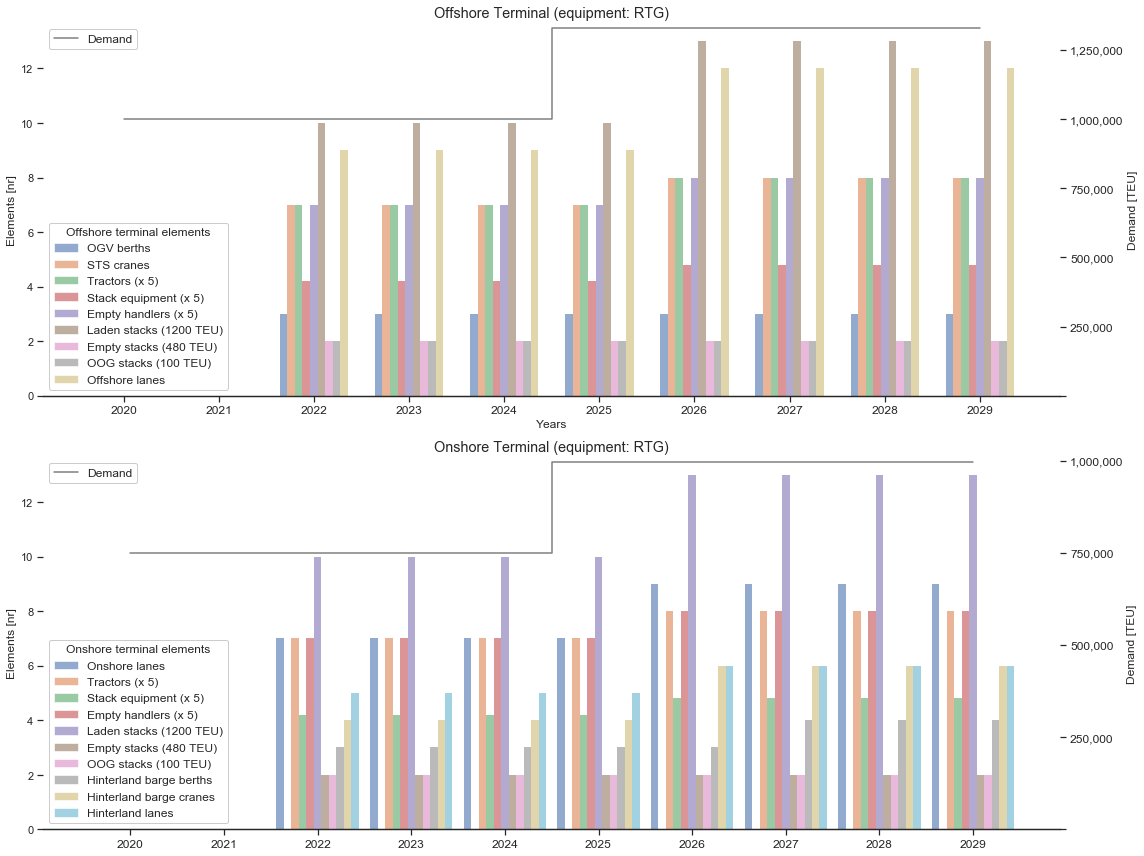

In [13]:
OffshoreBridge.terminal_elements_plot()
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/terminal_elements_1.png", bbox_inches = 'tight')
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/terminal_elements_2.png", bbox_inches = 'tight')

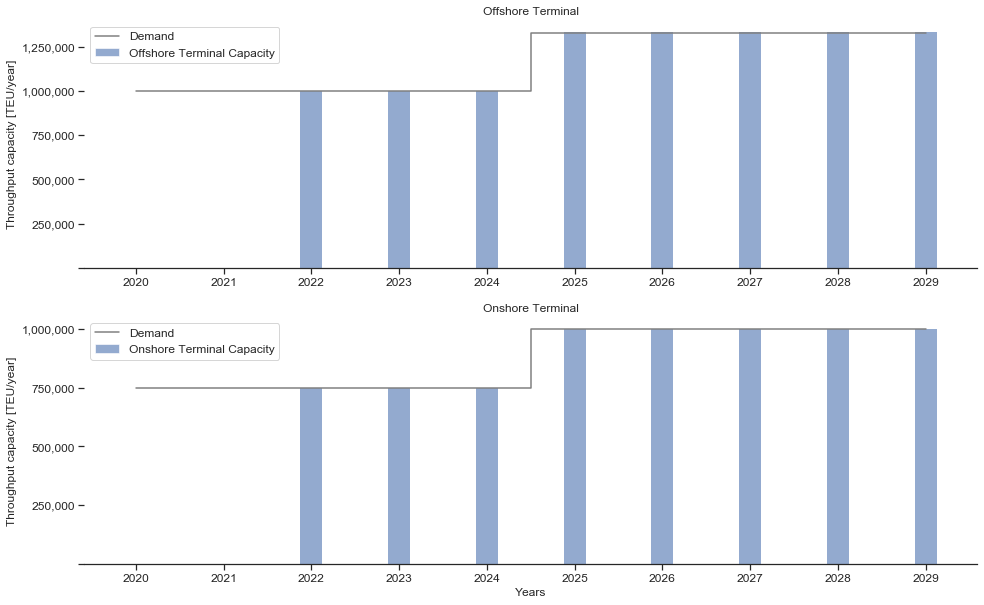

In [14]:
OffshoreBridge.terminal_capacity_plot()
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/terminal_capacity_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/terminal_capacity_2.png")

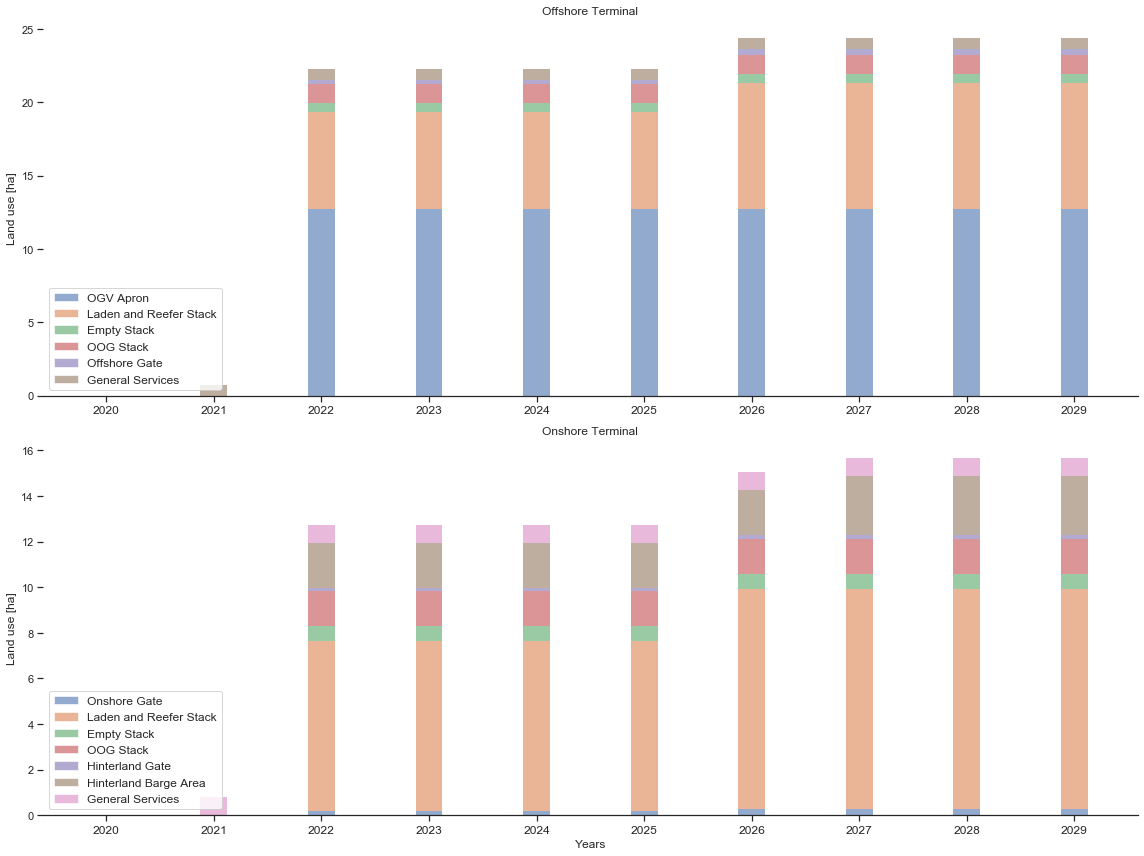

In [15]:
OffshoreBridge.terminal_land_use_plot(False)
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/storage_area_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/storage_area_2.png")

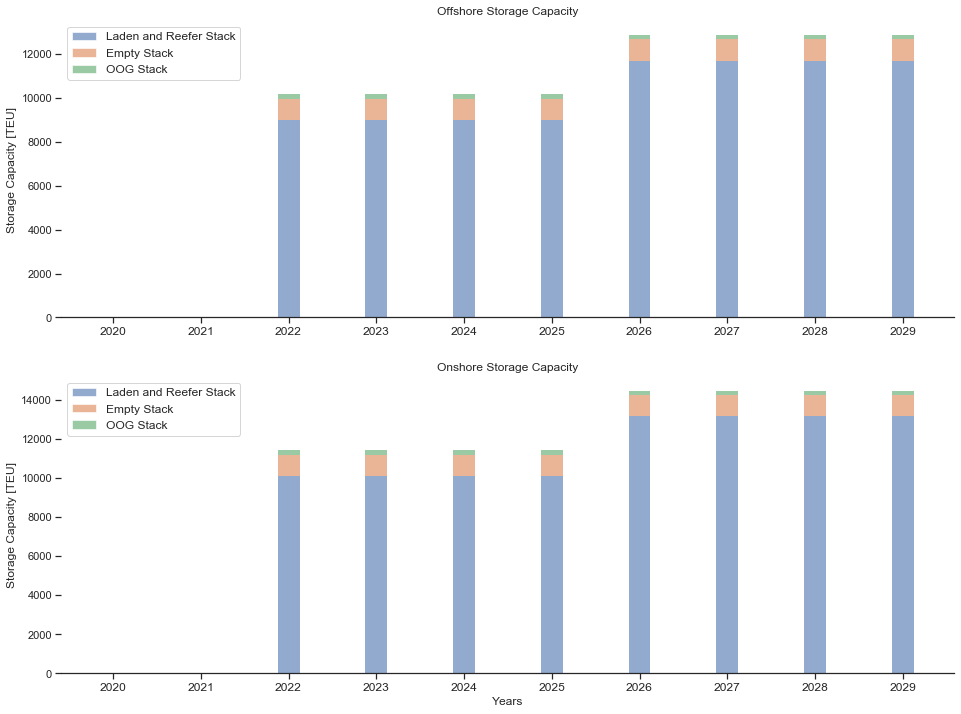

In [16]:
OffshoreBridge.storage_capacity_plot(False)
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/storage_capacity_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/storage_capacity_2.png")

In [17]:
# hide_columns_list = []
hide_columns_list = ['Offshore Maintenance', 'Offshore Insurance', 'Offshore Energy', 
                     'Offshore Labour', 'Offshore Fuel',
                     'Onshore Maintenance', 'Onshore Insurance', 'Onshore Energy', 
                     'Onshore Labour', 'Onshore Fuel', 'Demurrage', 'revenues']
cash_flows_real_df.style.hide_columns(hide_columns_list).hide_index()

Year,Reclamation,Coastal Protection,Coastal Structures Maintenance,Offshore Capex,Onshore Capex,Ocean Transport,Truck Capex,Truck Operations,Truck Maintenance,Truck Labour,Capital Dredging,Maintenance Dredging,Bridge Capex,Bridge Opex
2020,1.0226e+08,8.35091e+07,0,1.26021e+08,4.88648e+07,0,0,0,0,0,0,0,1.056e+09,0
2021,2.0482e+07,1.40668e+06,1.27006e+06,2.12787e+08,1.23223e+08,0,2.17132e+07,0,0,0,0,0,6.77575e+08,0
2022,0,0,1.41546e+06,0,0,5.55802e+07,0,2.08982e+06,2.08982e+06,3.33481e+06,0,0,0,4.07588e+07
2023,0,0,1.36233e+06,0,0,5.34939e+07,0,2.01137e+06,2.01137e+06,3.20964e+06,0,0,0,3.92289e+07
2024,0,0,1.31119e+06,0,0,5.1486e+07,0,1.93587e+06,1.93587e+06,3.08916e+06,0,0,0,3.77564e+07
2025,2.17935e+07,3.18629e+06,1.26197e+06,2.10937e+07,2.94508e+07,4.95534e+07,1.46678e+07,1.86321e+06,1.86321e+06,2.9732e+06,0,0,0,3.63392e+07
2026,0,0,1.4139e+06,0,2.48581e+06,4.76934e+07,0,3.20499e+06,3.20499e+06,3.81547e+06,0,0,0,3.49751e+07
2027,0,0,1.36083e+06,0,0,6.10512e+07,0,3.08469e+06,3.08469e+06,3.67225e+06,0,0,0,3.36623e+07
2028,0,0,1.30975e+06,0,0,5.87596e+07,0,2.9689e+06,2.9689e+06,3.53441e+06,0,0,0,3.23988e+07
2029,0,0,1.26059e+06,0,0,5.6554e+07,0,2.85746e+06,2.85746e+06,3.40174e+06,0,0,0,3.11826e+07


In [18]:
print('\033[1m    Cost Estimate\033[0m')
print(' ** PV of the costs: ${}'.format(f'{round(PV,-6):,}'))

    Cost Estimate
 ** PV of the costs: $4,021,000,000.0


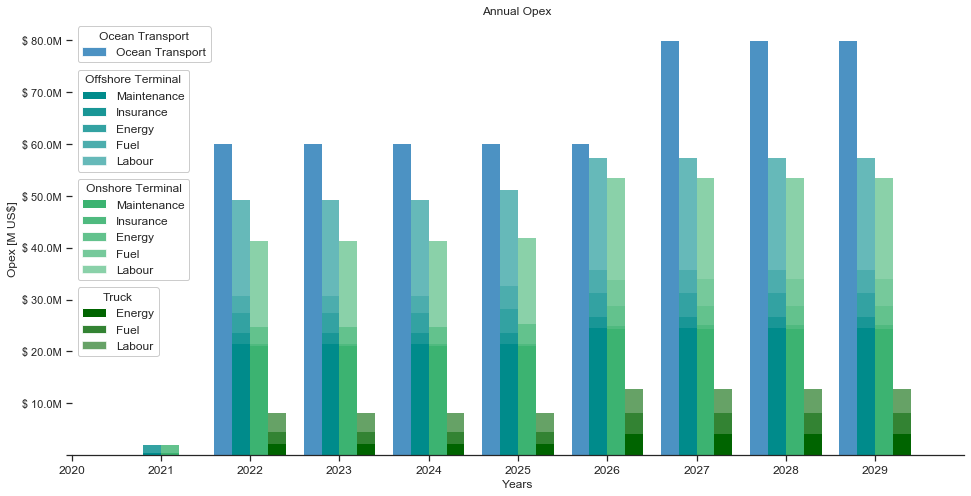

In [19]:
OffshoreBridge.terminal_opex_plot(cash_flows_df, False)
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/opex_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/opex_2.png")

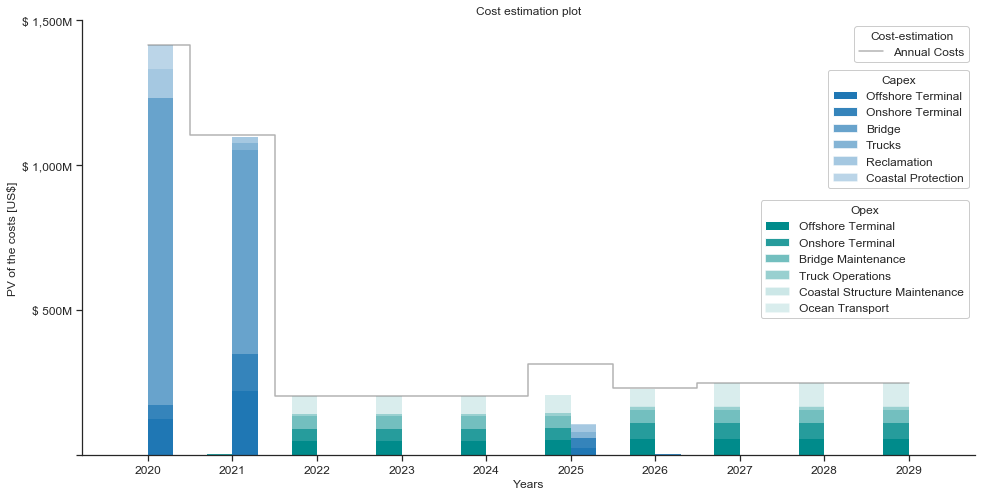

In [20]:
OffshoreBridge.cashflow_plot(cash_flows_df)
sns.despine(top=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/cash_flow_plot_1.png", bbox_inches = 'tight')
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/cash_flow_plot_2.png", bbox_inches = 'tight')

 ** PV of the costs: $4,021,000,000.0


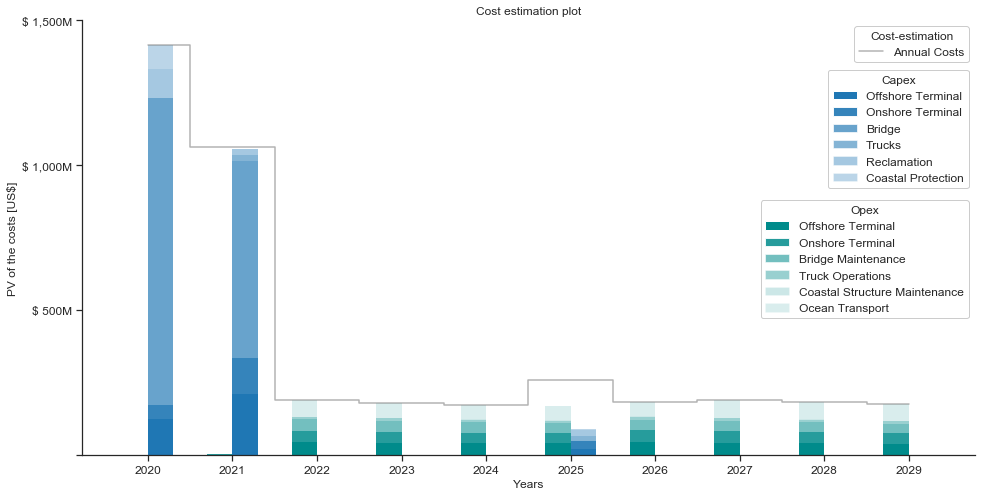

In [21]:
scroll_to_current_cell(preserve=True)

print(' ** PV of the costs: ${}'.format(f'{round(PV,-6):,}'))

OffshoreBridge.cashflow_plot(cash_flows_real_df)
sns.despine(top=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_3/cash_flow_plot_real_1.png", bbox_inches = 'tight')
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_3/cash_flow_plot_real_2.png", bbox_inches = 'tight')

,Element,Costs
0,Reclamation,1.445359e+08
1,Offshore Capex,3.599014e+08
2,Offshore Opex,3.478508e+08
3,Onshore Capex,2.040245e+08
4,Onshore Opex,3.074550e+08
5,Bridge Construction,1.733575e+09
6,Bridge Main.,2.863021e+08
7,Truck Investment,3.638099e+07
8,Truck Operations,6.706333e+07
9,Ocean Transport,4.341716e+08


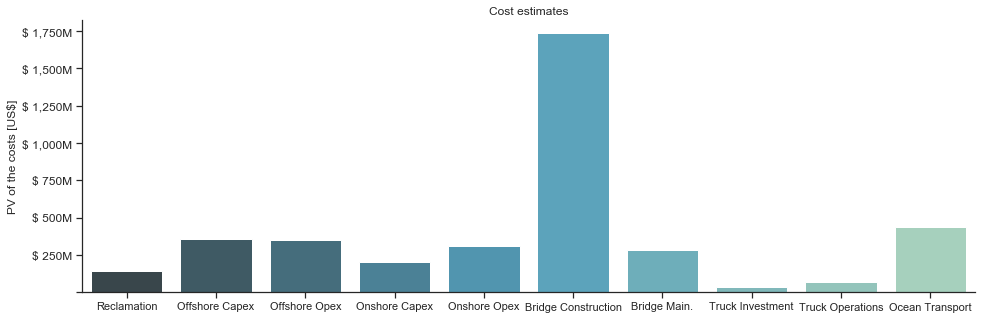

In [22]:
OffshoreBridge.element_cashflow_plot(fig_x = 16, fig_y = 5, include_dredging = False)
sns.despine(top=True)

In [23]:
print("Offshore terminal capacity for initial demand:")
total_offshore_ground_slots, total_offshore_stack_capacity, total_offshore_stack_online = OffshoreBridge.total_stack_capacity(2022)

total_offshore_ground_slots = round(total_offshore_ground_slots,-1)
total_offshore_stack_capacity = round(total_offshore_stack_capacity,-1)

Offshore terminal capacity for initial demand:
     Total Ground Slots required   (@ start of year):  1,841
     Total Stack capacity required (@ start of year):  9,400 TEU
     Total Stack capacity online   (@ start of year):  10,200 TEU

